<a href="https://colab.research.google.com/github/Mekondjo-EDSA/DSI_Capstone_project/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load train dataset into dataframe
train = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Outpatientdata-1542865627584.csv")

In [ ]:
#Load test dataset into dataframe 
test = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Outpatientdata-1542969243754.csv")

In [ ]:
#Print the shape of the target data 
print("target_data : ",train.shape)
print("train_beneficiary : ",train_beneficiary.shape)
print("train_inpatient : ",train_inpatient.shape)
print("train_outpatient : ",train_outpatient.shape)

target_data :  (5410, 2)
train_beneficiary :  (138556, 25)
train_inpatient :  (40474, 30)
train_outpatient :  (517737, 27)


In [ ]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

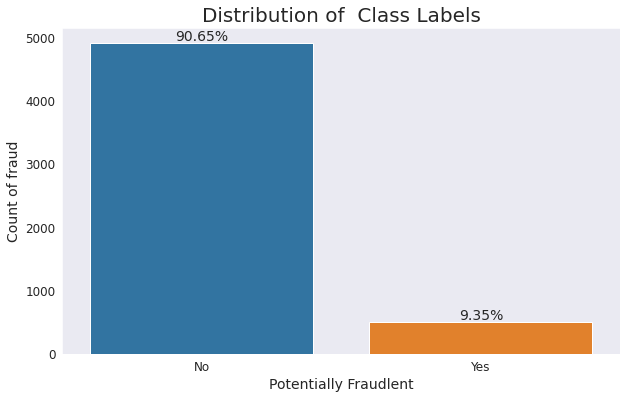

In [ ]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid', {'axes.grid' : False})
ax = sns.countplot(x='PotentialFraud',data =train)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Potentially Fraudlent', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, train['PotentialFraud'], 0,40,14)

In [ ]:


# Replacing 2 with 0 for chronic conditions, 0 indicates chronic condition is No

train_beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

test_Beneficiary = test_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)


In [ ]:
# convert all these columns datatypes to numeric
train_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = train_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

test_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = test_beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [ ]:
# Replacing '2' with '0' for Gender Type
train_beneficiary = train_beneficiary.replace({'Gender': 2}, 0)
test_beneficiary = test_beneficiary.replace({'Gender': 2}, 0)

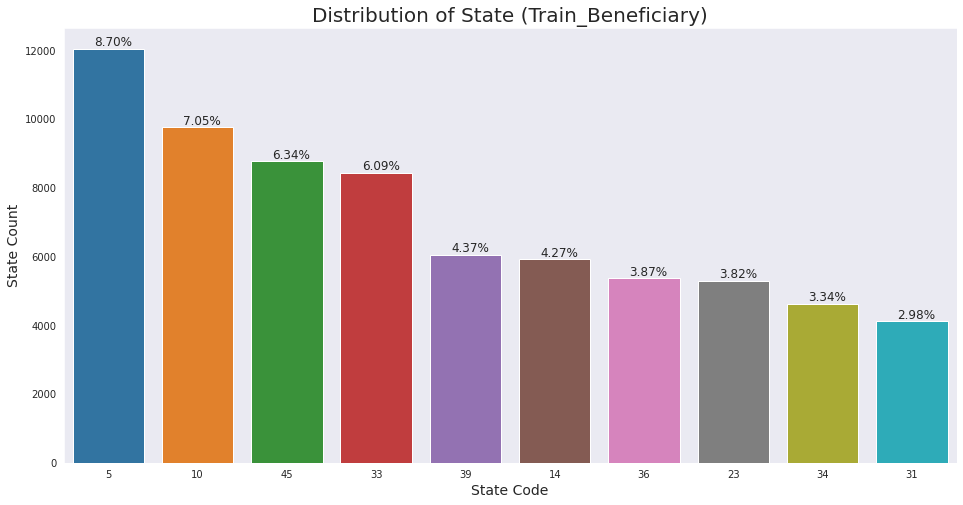

In [ ]:
# Plot top 10 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=train_beneficiary, orient ="v", order = train_beneficiary['State'].value_counts().head(10).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, train_beneficiary['State'], 0.05, 80,12)


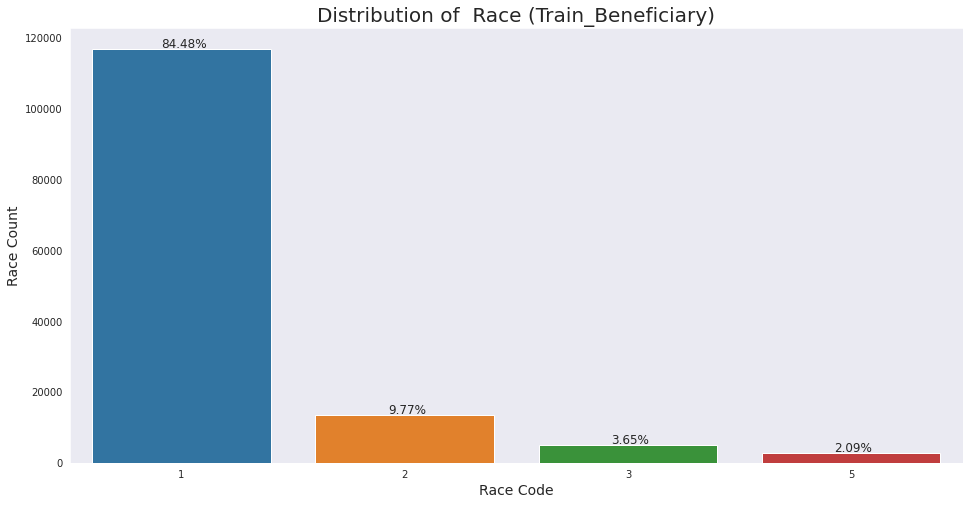

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=train_beneficiary, orient ="v", order = train_beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, train_beneficiary['Race'], 0.01, 200,12)

In [ ]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([train_inpatient["ClmProcedureCode_1"], 
                                   train_inpatient["ClmProcedureCode_2"],
                                   train_inpatient["ClmProcedureCode_3"],
                                   train_inpatient["ClmProcedureCode_4"], 
                                   train_inpatient["ClmProcedureCode_5"], 
                                   train_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

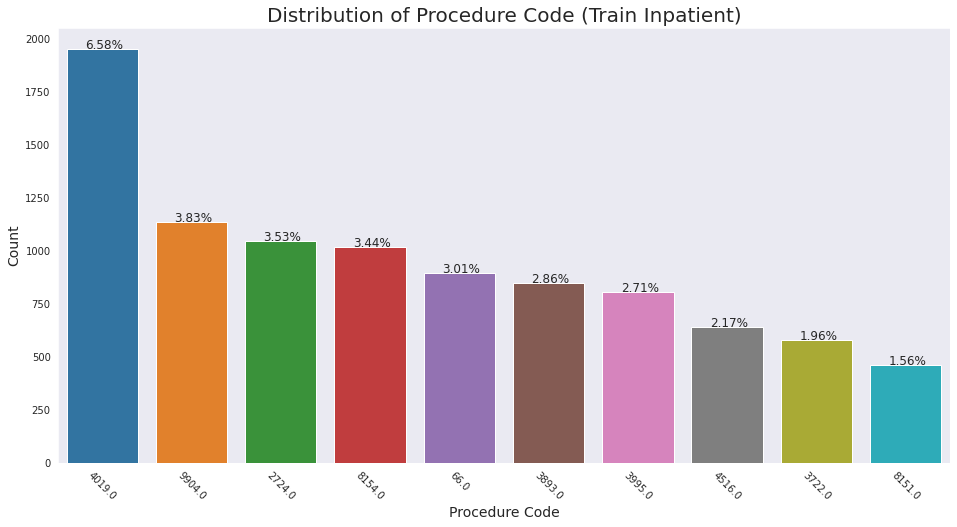

In [ ]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(10).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

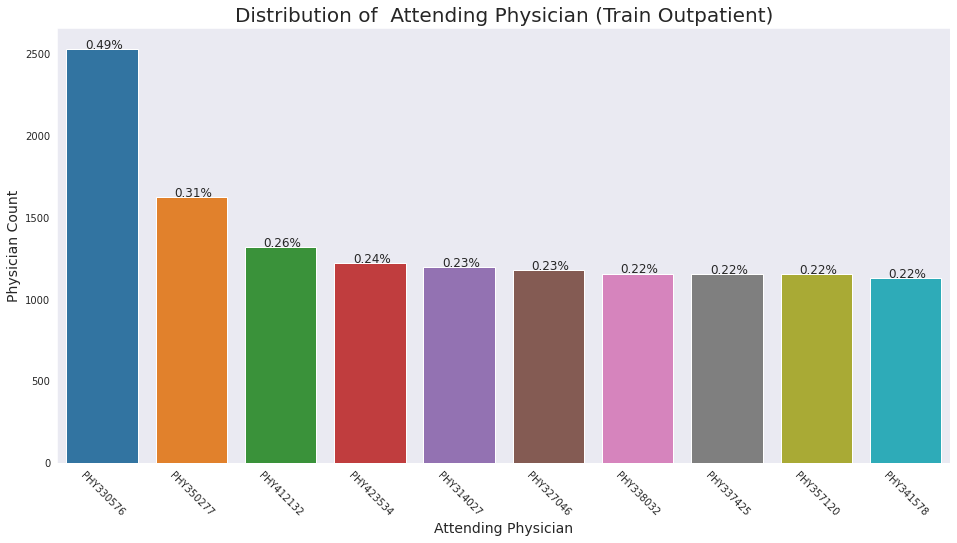

In [ ]:
# Top 10 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=train_outpatient, orient ="v", order = train_outpatient['AttendingPhysician'].value_counts().iloc[:10].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, train_outpatient['AttendingPhysician'], 0.02, 2, 12)

In [ ]:
#Calculate money lost in Fraud for both inpatient and outpatients
#merging Inpatint and labeled fradulent providers
inpatient_labeled_provider_df = pd.merge(train_inpatient , train , how='inner', on='Provider')
print(inpatient_labeled_provider_df.shape)

(40474, 31)


In [ ]:
#merging Outpatint and labeled fradulent providers
outpatient_labeled_provider_df = pd.merge(train_outpatient , train , how='inner', on='Provider')
print(outpatient_labeled_provider_df.shape)

(517737, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


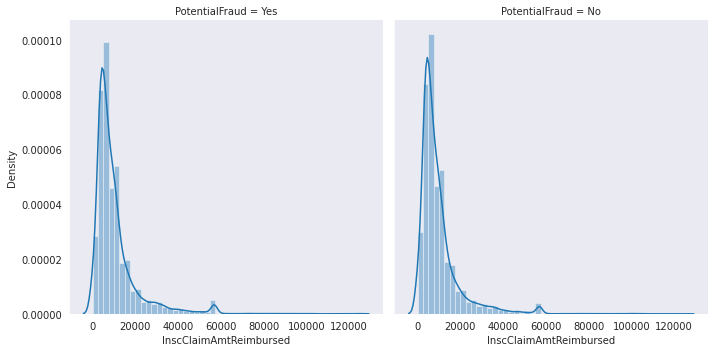

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.FacetGrid(inpatient_labeled_provider_df, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout()

In [ ]:
#calculatinng total money lost in fradulent encounters
Total_money_lost = inpatient_labeled_provider_df.loc[inpatient_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : " , Total_money_lost)

Total money lost :  241288510


In [ ]:
#calculatinng total money lost in fradulent encounters
Total_money_lost = outpatient_labeled_provider_df.loc[outpatient_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)


Total money lost :  54392610


In [ ]:
total = 241288510 + 54392610

In [ ]:
print('Total money lost due to fraudulent claims = ', total )

Total money lost due to fraudulent claims =  295681120
